# Make sure to install the necessary libraries before running the code
!pip install numpy pandas requests mysql-connector-python


In [1]:
# Import required libraries
import csv
import numpy as np
import pandas as pd
import os
import requests
import mysql.connector
from datetime import datetime, timedelta

In [2]:
def download_file(url, destination):
    response = requests.get(url)
    with open(destination, 'wb') as file:
        file.write(response.content)


In [3]:
if __name__ == "__main__":
    # Download CSV file
    file_url = "https://stooq.pl/q/d/l/?s=eurpln&i=d"
    current_directory = os.getcwd()
    destination_path = os.path.join(current_directory, "eurpln_d.csv")
    download_file(file_url, destination_path)
    print(f"File was saved as {destination_path}")


File was saved as C:\Users\48575\jupyter_netbook_curs\portfolio\euro\eurpln_d.csv


# Read CSV file into a DataFrame

In [4]:
df = pd.read_csv(destination_path, encoding='latin-1', sep=',')

In [5]:
df

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie
0,1984-09-24,0.00920,0.00920,0.00920,0.00920
1,1984-10-01,0.00940,0.00940,0.00940,0.00940
2,1984-10-08,0.00920,0.00920,0.00920,0.00920
3,1984-10-15,0.00920,0.00920,0.00920,0.00920
4,1984-10-22,0.00900,0.00900,0.00900,0.00900
...,...,...,...,...,...
8869,2024-04-15,4.28528,4.30810,4.27453,4.30273
8870,2024-04-16,4.30277,4.37274,4.30277,4.36579
8871,2024-04-17,4.36598,4.37014,4.32920,4.33716
8872,2024-04-18,4.33884,4.34065,4.32111,4.33664


# Perform data manipulations

In [6]:
# creating colums (DzienTygodnia	SkrotDzienTygodnia	Month	Short_Month)
df['Data'] = pd.to_datetime(df['Data'])
df['DzienTygodnia'] = df['Data'].apply(lambda date: date.strftime('%A'))
df['SkrotDzienTygodnia'] = df['DzienTygodnia'].str[:3]
df['Month'] = df['Data'].dt.strftime('%B')
df['Short_Month'] = df['Month'].str[:3]
df = df.sort_values(by='Data', ascending=False)

In [7]:
#creating colum mean 
df['mean'] = df[['Otwarcie', 'Najwyzszy', 'Najnizszy', 'Zamkniecie']].mean(axis=1)

In [8]:
df

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,DzienTygodnia,SkrotDzienTygodnia,Month,Short_Month,mean
8873,2024-04-19,4.33653,4.36876,4.30885,4.31060,Friday,Fri,April,Apr,4.331185
8872,2024-04-18,4.33884,4.34065,4.32111,4.33664,Thursday,Thu,April,Apr,4.334310
8871,2024-04-17,4.36598,4.37014,4.32920,4.33716,Wednesday,Wed,April,Apr,4.350620
8870,2024-04-16,4.30277,4.37274,4.30277,4.36579,Tuesday,Tue,April,Apr,4.336017
8869,2024-04-15,4.28528,4.30810,4.27453,4.30273,Monday,Mon,April,Apr,4.292660
...,...,...,...,...,...,...,...,...,...,...
4,1984-10-22,0.00900,0.00900,0.00900,0.00900,Monday,Mon,October,Oct,0.009000
3,1984-10-15,0.00920,0.00920,0.00920,0.00920,Monday,Mon,October,Oct,0.009200
2,1984-10-08,0.00920,0.00920,0.00920,0.00920,Monday,Mon,October,Oct,0.009200
1,1984-10-01,0.00940,0.00940,0.00940,0.00940,Monday,Mon,October,Oct,0.009400


# Describe the DataFrame

In [9]:
des = df.describe().transpose()
print(des)

             count                           mean                  min  \
Data          8874  2006-12-16 22:56:23.367140096  1984-09-24 00:00:00   
Otwarcie    8874.0                       3.705524                0.009   
Najwyzszy   8874.0                       3.718256                0.009   
Najnizszy   8874.0                       3.694353                0.009   
Zamkniecie  8874.0                       3.705743                0.009   
mean        8874.0                       3.705969                0.009   

                            25%                  50%                  75%  \
Data        1998-06-01 06:00:00  2007-01-18 12:00:00  2015-09-20 06:00:00   
Otwarcie               3.585575               4.0834             4.298973   
Najwyzszy               3.60005              4.10345             4.312745   
Najnizszy              3.577025               4.0654               4.2888   
Zamkniecie                3.587              4.08375              4.29943   
mean               

# Check missing values

In [10]:
missing_values = df.isnull().sum()
print(missing_values)

Data                  0
Otwarcie              0
Najwyzszy             0
Najnizszy             0
Zamkniecie            0
DzienTygodnia         0
SkrotDzienTygodnia    0
Month                 0
Short_Month           0
mean                  0
dtype: int64


# Check data types
be sure u have same types of data in ur sql 

In [11]:
data_types = df.dtypes
print(data_types)


Data                  datetime64[ns]
Otwarcie                     float64
Najwyzszy                    float64
Najnizszy                    float64
Zamkniecie                   float64
DzienTygodnia                 object
SkrotDzienTygodnia            object
Month                         object
Short_Month                   object
mean                         float64
dtype: object


# Export DataFrame to a text file

In [12]:
y = [tuple(row) for row in df.to_records(index=False)]
with open('file_import.txt', 'w') as file:
        for row_tuple in y:
            file.write(str(row_tuple) + ',\n')


# Connect to MySQL database
- Host: [**Your Host IP**]
- Port:port 2 connect
- User: root
- Password: [**Your Password**] (or No password if empty)
- Database: Name of database

In [13]:
conn = mysql.connector.connect(
    host='127.0.0.1',
    port=3306,
    user='root',
    password='',
    database='Euro'
)

In [14]:
cursor = conn.cursor()

# Truncate existing table
- (Name of ur table in data_base)

In [15]:
cursor.execute("TRUNCATE TABLE euro_kurs")

# Prepare and execute SQL INSERT statement
- make sure u have same numbers of columns - %s 

In [16]:
sql = "INSERT INTO euro_kurs VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s )"

# Execute the SQL statement using your MySQL connection

In [17]:
for row_tuple in df.itertuples(index=False):
    # Convert timestamp to string in a format recognized by MySQL
    row_tuple = tuple(
        val.strftime('%Y-%m-%d %H:%M:%S') if isinstance(val, pd.Timestamp) else val
        if not isinstance(val, (np.float64, np.int64)) else float(val)
        for val in row_tuple
    )
    cursor.execute(sql, row_tuple)


# Commit the changes to the database


In [18]:
conn.commit()

# Close the cursor and connection


In [19]:
cursor.close()
conn.close()

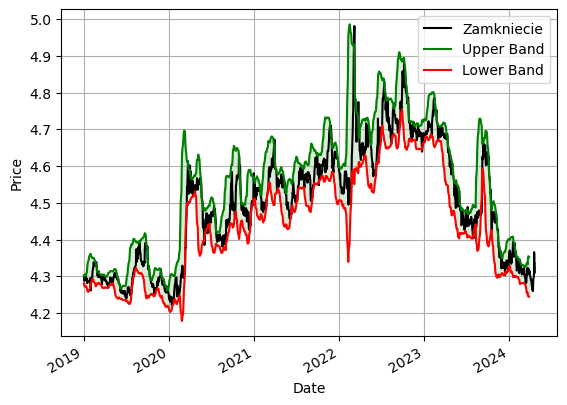

In [20]:
import matplotlib.pyplot as plt

# Przykładowe dane
# (Zakładam, że masz już wczytany DataFrame df z odpowiednimi danymi.)
std_dev = df['Zamkniecie'].rolling(window=20).std()
sma = df['Zamkniecie'].rolling(window=20).mean()

lower_band = sma - 2 * std_dev
lower_band = lower_band.rename("lower band")

upper_band = sma + 2 * std_dev
upper_band = upper_band.rename("upper band")

# Convert Series to DataFrame and add suffixes to column names
upper_band_df = upper_band.to_frame()
upper_band_df.columns = [f"{col}_upper" for col in upper_band_df.columns]

lower_band_df = lower_band.to_frame()
lower_band_df.columns = [f"{col}_lower" for col in lower_band_df.columns]

# Create a copy of df to avoid modifying the original DataFrame
df_copy = df.copy()

df_copy = df_copy.join(upper_band_df).join(lower_band_df)

# set data from 2019 
start_date = '2019-01-01'
end_date = df_copy['Data'].max()
df_copy = df_copy[(df_copy['Data'] >= start_date) & (df_copy['Data'] <= end_date)]

ax = df_copy.plot(x='Data', y='Zamkniecie', label='Zamkniecie', color='black')
ax.plot(df_copy['Data'], df_copy['upper band_upper'], label='Upper Band', color='green')
ax.plot(df_copy['Data'], df_copy['lower band_lower'], label='Lower Band', color='red')

ax.fill_between(df_copy['Data'], df_copy['lower band_lower'], df_copy['upper band_upper'], color='g', alpha=0.15)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.grid()
ax.legend()

plt.show(block=True)



In [21]:
from sklearn.model_selection import train_test_split

# Select the features and target variable
# Assuming you want to predict the 'Zamkniecie' column based on other columns
features = df[['Otwarcie', 'Najwyzszy', 'Najnizszy']]
target = df['Zamkniecie']

# Split the data into training and testing sets
# Here, 80% of the data will be used for training, and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# X_train: Training features
# X_test: Testing features
# y_train: Training target variable
# y_test: Testing target variable

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset (assuming a CSV file)
df = pd.read_csv('C:/Users/48575/jupyter_netbook_curs/portfolio/euro/eurpln_d.csv', delimiter=';')
df.columns = df.columns.str.strip()

# Select the features and target variable
features = df[['Feature1', 'Feature2', 'Feature3']]
target = df['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
df.columns = df.columns.str.strip()

KeyError: "None of [Index(['Feature1', 'Feature2', 'Feature3'], dtype='object')] are in the [columns]"

In [ ]:
df